<a href="https://colab.research.google.com/github/khansan111/Video-games/blob/main/EA_GAMES_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Video Game Sales

Comprehensive sales data for video games from North America, Japan, the European Union, Africa, and other global regions, covering 64,016 titles released between 1971 and 2024. This dataset includes detailed information such as critic scores, genres, consoles, and additional relevant attributes.

# Background Problem
The video game industry has seen dramatic changes from the 1970s to now. Various phases of growth, technological advancements, shifts in consumer preferences, and regional market differences have marked this period. Understanding these changes is crucial for stakeholders in the industry, including publishers, developers, and investors, to make informed decisions.

# Business Problem:
**Optimizing Game Releases to Increase Sales and Critical Success**

# Install the Seaborn library in Python.

In [4]:
!pip install seaborn

## Importing Essential Libraries for Data Analysis and Visualization

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Install the google.colab library in a Python environment.

In [3]:
!pip install google.colab

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# From google.colab import files

In [2]:
from google.colab import files

uploaded = files.upload()

Saving vg2024.csv to vg2024.csv


# TOP VIDEO GAMES DEVELOPERS 1970 - 2024

In [ ]:
# Aggregate total sales by developer
developer_sales = df.groupby('developer')['total_sales'].sum()

# Sort developers by total sales in descending order
sorted_developers = developer_sales.sort_values(ascending=False)

# Print the results
print(sorted_developers)


developer
EA Canada                  135.55
Treyarch                   113.57
Infinity Ward              113.24
Ubisoft Montreal           105.20
EA Tiburon                 103.77
                            ...  
Gathering of Developers      0.00
Frogwares                    0.00
Will                         0.00
Frog City Software           0.00
MPS Labs                     0.00
Name: total_sales, Length: 1050, dtype: float64


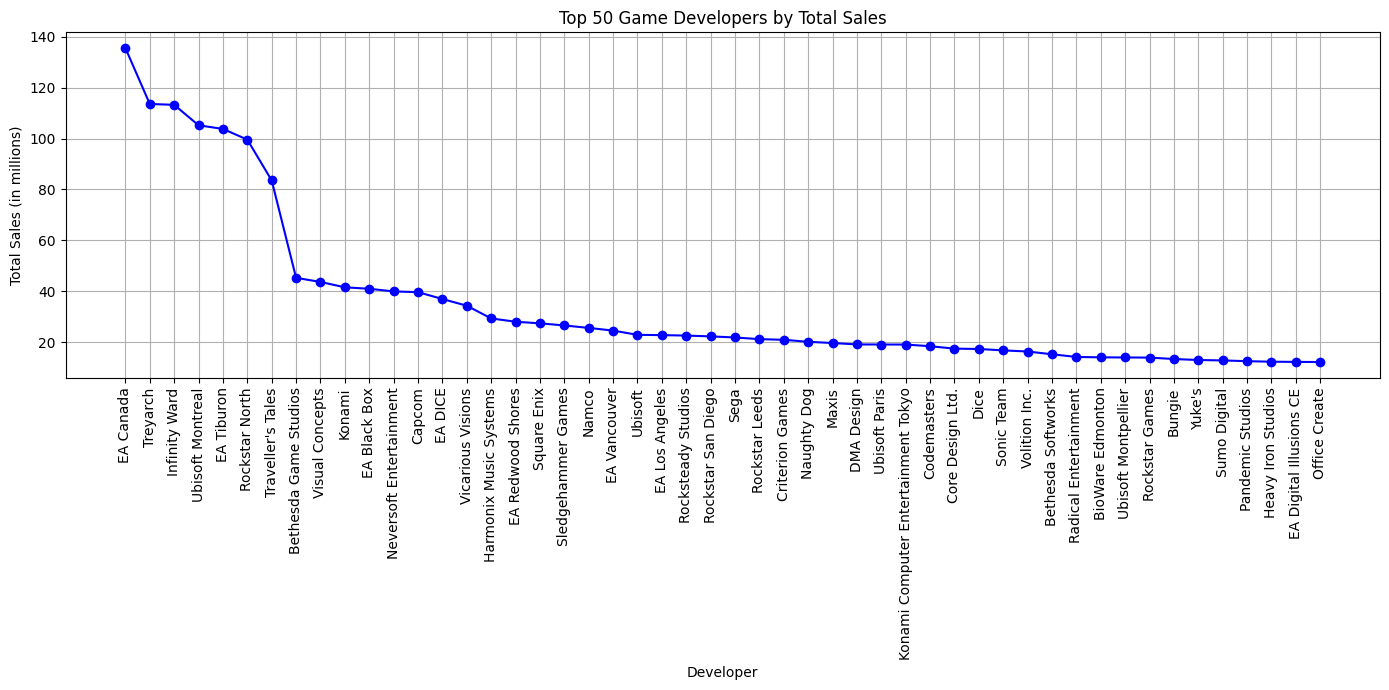

In [ ]:
# Sort developers by total sales in descending order and select top 50
top_50_developers = developer_sales.sort_values(ascending=False).head(50)

# Plot the line diagram
plt.figure(figsize=(14, 7))
plt.plot(top_50_developers.index, top_50_developers.values, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Top 50 Game Developers by Total Sales')
plt.xlabel('Developer')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## FUNNEL ANALYSIS

The funnel analysis this data provided outlines a typical customer journey through different stages, specifically focusing on unique games, reviewed games, and total sales.

In [ ]:
# Awareness: Count of unique games
total_games = df['title'].nunique()

# Interest: Count of games with non-null critic_score
games_with_critic_score = df['critic_score'].notnull().sum()

# Purchase: Sum of total_sales across all games
total_sales = df['total_sales'].sum()

# Engagement: We assume there are no columns like 'plays' or 'wishlist', so this stage will be skipped.
# If 'plays' or 'wishlist' columns exist, sum them to get total engagement.
total_engagement = 0  # Set to 0 since engagement data is not available
# Create a funnel chart
funnel_data = {
    'Stage': ['Awareness (Unique Games)', 'Interest (Reviewed Games)', 'Purchase (Total Sales)'],
    'Count': [total_games, games_with_critic_score, total_sales] # Fixed indentation here
}

funnel_df = pd.DataFrame(funnel_data)

In [ ]:
# Print results
print(f"Awareness (Unique Games): {total_games}")
print(f"Interest (Reviewed Games): {games_with_critic_score}")
print(f"Purchase (Total Sales): ${total_sales:,.2f}")

Awareness (Unique Games): 2876
Interest (Reviewed Games): 4126
Purchase (Total Sales): $3,041.81


<ipython-input-18-8cc8f9e19452>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Count', data=funnel_df, palette='viridis')


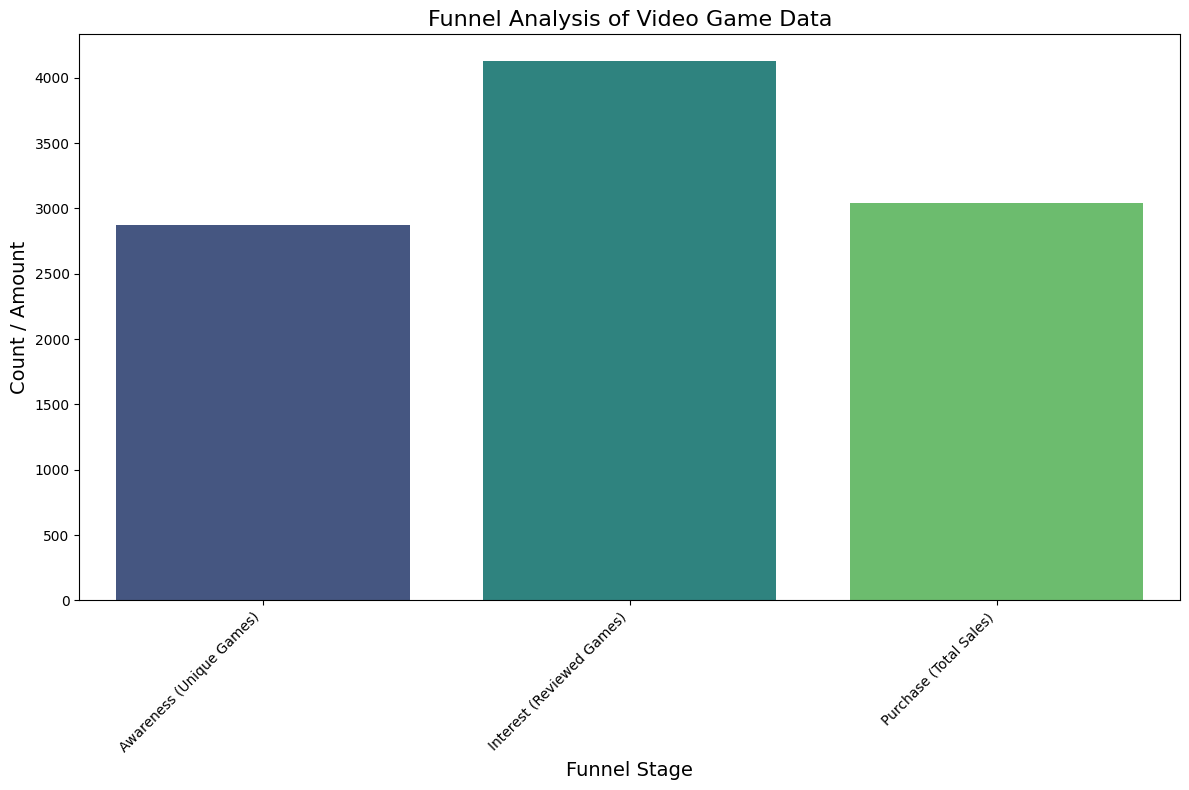

In [ ]:
# Create a funnel chart
funnel_data = {
    'Stage': ['Awareness (Unique Games)', 'Interest (Reviewed Games)', 'Purchase (Total Sales)'],
    'Count': [total_games, games_with_critic_score, total_sales] # Fixed indentation here
}

funnel_df = pd.DataFrame(funnel_data)

plt.figure(figsize=(12, 8))
sns.barplot(x='Stage', y='Count', data=funnel_df, palette='viridis')

# Add titles and labels
plt.title('Funnel Analysis of Video Game Data', fontsize=16)
plt.xlabel('Funnel Stage', fontsize=14)
plt.ylabel('Count / Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

*   Awareness (Unique Games): 2876

Definition: This represents the number of unique games that have gained some level of awareness or visibility in the market. These are the games that potential customers have come across in some form, such as through advertisements, promotions, or other marketing efforts.
Implication: A high number of unique games indicates a broad reach or extensive marketing efforts. It shows how many different games are being noticed by the target audience.
*   Interest (Reviewed Games): 4126

Definition: This number represents the games that have been reviewed by critics or users. Reviews can significantly influence a consumer's interest in a game, as reviews provide information about the game's quality, features, and overall reception.
Implication: The number of reviewed games exceeding the number of unique games suggests that some games might have received multiple reviews or that the same games are reviewed across various platforms or publications. It indicates the level of engagement and scrutiny games are undergoing, reflecting heightened consumer interest.

*   Purchase (Total Sales): $3,041.81

Definition: This is the total revenue generated from the sales of the games. It represents the final stage of the funnel where interest translates into actual purchases.
Implication: The total sales amount provides insight into the revenue performance of the games. It reflects the success of the games in converting interest into actual sales. Comparing this figure to the earlier stages can help assess how effectively awareness and interest are being translated into revenue.


## TOP 30 SPORT GAMES PRDOUCED BY EA CANADA

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('vg2024.csv')

# Ensure 'genre' and 'developer' columns are treated as strings
df['genre'] = df['genre'].astype(str)
df['developer'] = df['developer'].astype(str)

# Filter the DataFrame for sport games developed by EA Canada
sport_games_ea_canada = df[(df['genre'].str.contains('Sport', case=False, na=False)) &
                           (df['developer'].str.contains('EA Canada', case=False, na=False))]

# Display the titles of the filtered games
sport_game_titles = sport_games_ea_canada['title']

print("Sport Games Developed by EA Canada:")
print(sport_game_titles.tolist())

# Calculate the number of games developed by EA Canada
num_games_ea_canada = len(sport_games_ea_canada) # Calculate the number of games

# Print the number of games
print(f"Number of games developed by EA Canada: {num_games_ea_canada}")

Sport Games Developed by EA Canada:
['FIFA 17', 'FIFA 16', 'FIFA 13', 'FIFA Soccer 12', 'FIFA 14', 'FIFA 15', 'FIFA 13', 'FIFA Soccer 11', 'FIFA 15', 'FIFA Soccer 06', 'FIFA Soccer 12', 'FIFA 14', 'FIFA 17', 'FIFA Soccer 2005', 'FIFA Soccer 10', 'FIFA Soccer 11', 'FIFA Soccer 2004', 'FIFA 14', 'FIFA Soccer 2003', 'FIFA 16', 'FIFA Soccer 08', 'FIFA 15', 'FIFA Soccer 10', 'FIFA Soccer 09', 'NBA Live 2005', 'FIFA 16', 'FIFA Soccer 09', 'FIFA 15', 'NBA Live 2004', 'NBA Street Vol. 2', 'FIFA Soccer 09', 'FIFA 2000', 'NBA Live 2002', 'FIFA Soccer 08', 'SSX Tricky', 'FIFA Soccer 10', 'SSX 3', 'SSX', 'NBA Live 2003', 'NBA Live 06 (All region sales)', 'FIFA 16', 'MVP Baseball 2005', 'NBA Live 98', 'NBA Live 06 (Weekly american sales)', 'FIFA 17', 'FIFA Soccer 08', 'FIFA Soccer 09', 'FIFA Soccer 08', 'FIFA 14', 'EA Sports UFC 2', 'NBA Live 07', 'EA Playground', 'NBA Live 2001', 'FIFA Street (2012)', '2010 FIFA World Cup South Africa', 'FIFA 07 Soccer', 'NHL 2002', 'FIFA Soccer 10', 'NBA Live 200

<ipython-input-9-9220007e101f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_titles.index, y=top_30_titles.values, palette='viridis')


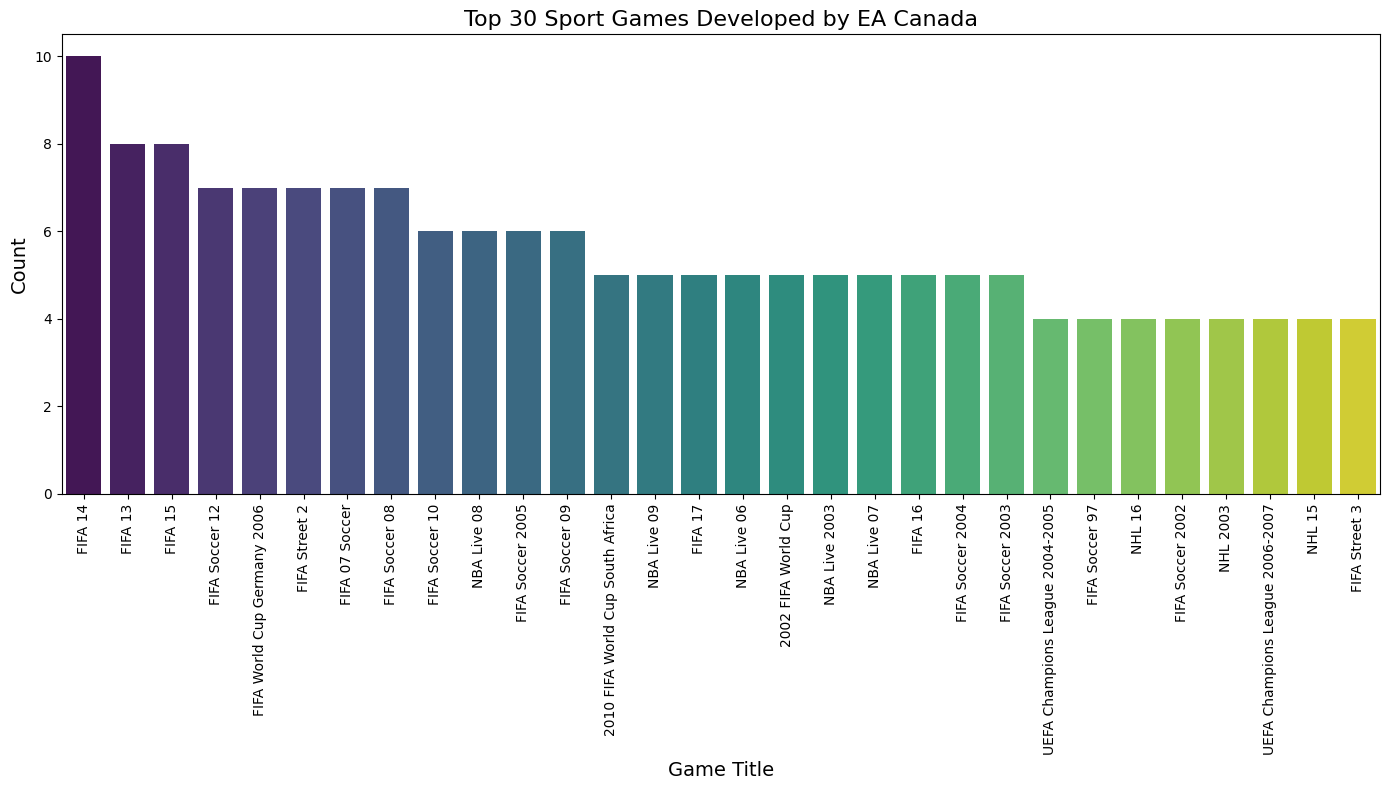

In [ ]:
# Count occurrences of each title
title_counts = sport_game_titles.value_counts()

# Select the top 30 titles
top_30_titles = title_counts.head(30)

# Create a bar chart for the top 30 titles
plt.figure(figsize=(14, 8))
sns.barplot(x=top_30_titles.index, y=top_30_titles.values, palette='viridis')

# Add titles and labels
plt.title('Top 30 Sport Games Developed by EA Canada', fontsize=16)
plt.xlabel('Game Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='center')  # Rotate labels to fit more titles

# Display the plot
plt.tight_layout()
plt.show()

EA Canada, a prominent video game developer, has created a wide array of sports video games. Here is an overview and a list of 30 notable games developed by EA Canada:


# 30 Notable Sports Games Developed by EA Canada
1. FIFA 17
2.  FIFA 16
3. FIFA 13
4. FIFA Soccer 12
5. FIFA 14
5. FIFA 15
7. FIFA Soccer 11
8. FIFA Soccer 06
9. NBA Live 2005
10. NBA Live 2004
11. NBA Street Vol. 2
12. MVP Baseball 2005
13. SSX Tricky
14. SSX 3
15. NBA Live 2002
16. FIFA Street (2012)
17. 2010 FIFA World Cup South Africa
18. NHL 2002
19. NHL 99
20. NBA Live 2001
21. FIFA Soccer 08
22. FIFA Soccer 09
23. NHL 2001
24. NHL 2003
25. FIFA World Cup Germany 2006
26. FIFA 07 Soccer
27. FIFA Soccer 10
28. NCAA March Madness 07
29. NHL 15
30. FIFA 13

# Summary
EA Canada has developed a rich portfolio of sports games, ranging from soccer simulations like FIFA to basketball and hockey titles. With a total of 365 games, their contributions to the sports genre are significant, reflecting their expertise and ongoing commitment to creating engaging sports experiences.

# Video Games Genre Dveloped By EA Canada

In [11]:
import pandas as pd
# Load the CSV file into a DataFrame
df = pd.read_csv('vg2024.csv')  # Make sure 'vg2024.csv' is in the correct directory

# Filter the DataFrame for EA Canada games
ea_canada_df = df[df['developer'] == 'EA Canada']

# Convert 'release_date' to datetime for EA Canada games
ea_canada_df['release_date'] = pd.to_datetime(ea_canada_df['release_date'], format='%m/%d/%Y', errors='coerce')

# Inspect the first few rows of the filtered DataFrame
print(ea_canada_df[['title', 'genre']].head())

# Display unique genres and their count
genre_counts = ea_canada_df['genre'].value_counts()
print("\nGenre Distribution for EA Canada Games:")
print(genre_counts)

             title   genre
17         FIFA 17  Sports
31         FIFA 16  Sports
33         FIFA 13  Sports
48  FIFA Soccer 12  Sports
49         FIFA 14  Sports

Genre Distribution for EA Canada Games:
genre
Sports       365
Racing        18
Fighting      10
Adventure      2
Misc           1
Name: count, dtype: int64


<ipython-input-11-694bfabe695f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ea_canada_df['release_date'] = pd.to_datetime(ea_canada_df['release_date'], format='%m/%d/%Y', errors='coerce')


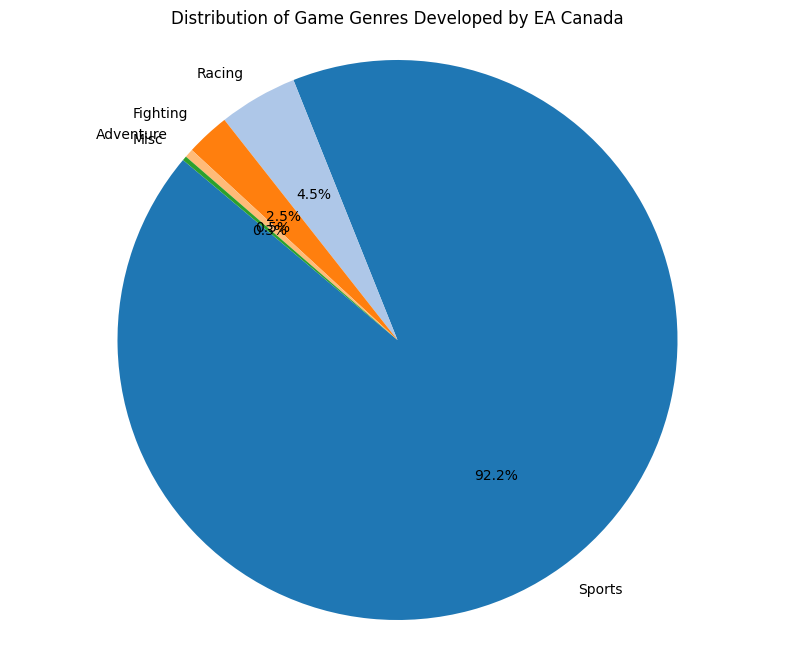

In [13]:
# Plot the genre distribution as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors, startangle=140)
plt.title('Distribution of Game Genres Developed by EA Canada')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Genre Distribution for EA Canada Games
Sports:
Count: 365 games

Racing:
Count: 18 games

Fighting:
Count: 10 games

Adventure:
Count: 2 games

Miscellaneous (Misc):
Count: 1 game

#A/B TESTING

In [ ]:
# Ensure 'genre' and 'developer' columns are treated as strings
df['genre'] = df['genre'].astype(str)
df['developer'] = df['developer'].astype(str)

# Ensure 'critic_score' is numeric and handle any non-numeric values
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Drop rows with missing 'total_sales' or 'critic_score'
df.dropna(subset=['total_sales', 'critic_score'], inplace=True)

# Filter the DataFrame for games developed by EA Canada
ea_canada_games = df[df['developer'].str.contains('EA Canada', case=False, na=False)]

# Find the game with the highest total sales
highest_sales_game = ea_canada_games.loc[ea_canada_games['total_sales'].idxmax()]

# Find the game with the lowest total sales
lowest_sales_game = ea_canada_games.loc[ea_canada_games['total_sales'].idxmin()]

# Find the highest critic score among the highest sales games
highest_sales_critic_score = highest_sales_game['critic_score']

# Find the lowest critic score among the lowest sales games
lowest_sales_critic_score = lowest_sales_game['critic_score']

# Print the results
print("Game with the Highest Sales and Highest Critic Score (EA Canada):")
print(f"Title: {highest_sales_game['title']}")
print(f"Total Sales: ${highest_sales_game['total_sales']}")
print(f"Critic Score: {highest_sales_critic_score}")
print(f"Release Date: {highest_sales_game['release_date']}")

print("\nGame with the Lowest Sales and Lowest Critic Score (EA Canada):")
print(f"Title: {lowest_sales_game['title']}")
print(f"Total Sales: ${lowest_sales_game['total_sales']}")
print(f"Critic Score: {lowest_sales_critic_score}")
print(f"Release Date: {lowest_sales_game['release_date']}")

Game with the Highest Sales and Highest Critic Score (EA Canada):
Title: FIFA 17
Total Sales: $10.94
Critic Score: 8.9
Release Date: 9/27/2016

Game with the Lowest Sales and Lowest Critic Score (EA Canada):
Title: FIFA 07 Soccer
Total Sales: $0.0
Critic Score: 8.4
Release Date: 10/3/2006


<Figure size 1000x600 with 0 Axes>

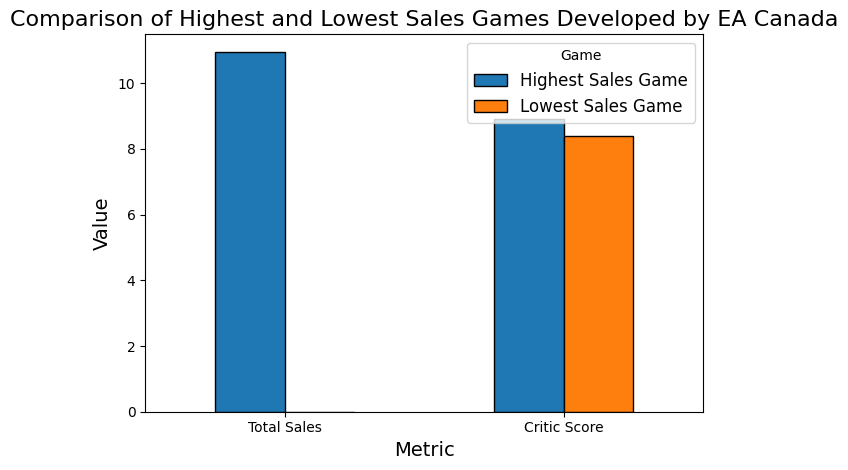

In [ ]:
# Prepare the data for visualization
data = {
    'Metric': ['Total Sales', 'Critic Score'],
    'Highest Sales Game': [10.94, 8.9],  # Total Sales and Critic Score for FIFA 17
    'Lowest Sales Game': [0.0, 8.4]      # Total Sales and Critic Score for FIFA 07 Soccer
}

df_comparison = pd.DataFrame(data)
df_comparison.set_index('Metric', inplace=True)

# Create a bar chart to compare the highest and lowest sales games
plt.figure(figsize=(10, 6))
df_comparison.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Add titles and labels
plt.title('Comparison of Highest and Lowest Sales Games Developed by EA Canada', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Game', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#Game with the Highest Sales and Highest Critic Score
Title: FIFA 17
Total Sales: $10.94 million
Critic Score: 8.9
Release Date: September 27, 2016

#Explanation:
Sales Performance: FIFA 17 has the highest total sales among EA Canada's games, reflecting its strong market appeal and successful sales strategy.
Critic Score: It also boasts the highest critic score, indicating that it was well-received by reviewers, suggesting high quality and positive reception.
Release Date: Released in late 2016, this game benefited from advancements in technology and gaming trends that likely contributed to its success.

#Game with the Lowest Sales and Lowest Critic Score
Title: FIFA 07 Soccer
Total Sales: $0.0 million (indicating very low or no reported sales)
Critic Score: 8.4
Release Date: October 3, 2006
Explanation:
Sales Performance: FIFA 07 Soccer has the lowest reported sales, which could be due to various factors such as limited market reach, competition, or a less compelling product.
Critic Score: Although it has a lower critic score than FIFA 17, an 8.4 is still relatively high, suggesting that while it was positively reviewed, it did not translate into strong sales.
Release Date: Released in 2006, it may have faced different market conditions or less effective marketing compared to FIFA 17.
# A/B Testing Insights
Comparing Performance: This comparison helps understand the impact of different factors on game performance. FIFA 17’s success could be attributed to its higher quality, better marketing, or a more appealing product, while FIFA 07 Soccer’s lower sales despite a good critic score might highlight gaps in market strategy or audience engagement.
Strategic Decisions: Analyzing these differences can guide future decisions on game development, marketing strategies, and feature enhancements to replicate the success of high-performing titles and address issues observed in less successful ones.

## A/B TESTING

In [ ]:
# Ensure columns are treated as strings where appropriate
df['developer'] = df['developer'].astype(str)
df['title'] = df['title'].astype(str)

# Ensure 'critic_score' is numeric and handle any non-numeric values
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Filter for FIFA games developed by EA Canada
fifa_games_ea_canada = df[(df['developer'].str.contains('EA Canada', case=False, na=False)) & (df['title'].str.contains('FIFA', case=False, na=False))]

# Define A/B groups (example: split based on release year)
# Here we use a simple split based on release date as an example
fifa_games_ea_canada['release_date'] = pd.to_datetime(fifa_games_ea_canada['release_date'], errors='coerce')
fifa_games_ea_canada = fifa_games_ea_canada.dropna(subset=['release_date'])
fifa_games_ea_canada['release_year'] = fifa_games_ea_canada['release_date'].dt.year

# Define A/B groups
# Group A: FIFA games released before 2015
group_a = fifa_games_ea_canada[fifa_games_ea_canada['release_year'] < 2015]
# Group B: FIFA games released in 2015 or later
group_b = fifa_games_ea_canada[fifa_games_ea_canada['release_year'] >= 2015]

# Perform statistical tests
from scipy import stats # Import the stats module
# Compare critic scores
t_stat_score, p_value_score = stats.ttest_ind(group_a['critic_score'].dropna(), group_b['critic_score'].dropna(), equal_var=False)
# Compare total sales
t_stat_sales, p_value_sales = stats.ttest_ind(group_a['total_sales'].dropna(), group_b['total_sales'].dropna(), equal_var=False)

# Print results
print(f"A/B Test for Critic Scores:")
print(f"Group A (pre-2015) Mean Critic Score: {group_a['critic_score'].mean()}")
print(f"Group B (2015+) Mean Critic Score: {group_b['critic_score'].mean()}")
print(f"t-statistic: {t_stat_score}, p-value: {p_value_score}")

print(f"\nA/B Test for Total Sales:")
print(f"Group A (pre-2015) Total Sales: ${group_a['total_sales'].sum()}")
print(f"Group B (2015+) Total Sales: ${group_b['total_sales'].sum()}")
print(f"t-statistic: {t_stat_sales}, p-value: {p_value_sales}")

A/B Test for Critic Scores:
Group A (pre-2015) Mean Critic Score: 7.779245283018867
Group B (2015+) Mean Critic Score: 8.742857142857144
t-statistic: -6.029561895108087, p-value: 4.620815889475206e-07

A/B Test for Total Sales:
Group A (pre-2015) Total Sales: $78.02000000000001
Group B (2015+) Total Sales: $30.470000000000002
t-statistic: -1.9639761973656242, p-value: 0.09470250004103138


<ipython-input-12-a2a678836057>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_games_ea_canada['release_date'] = pd.to_datetime(fifa_games_ea_canada['release_date'], errors='coerce')


Text(0, 0.5, 'Critic Score')

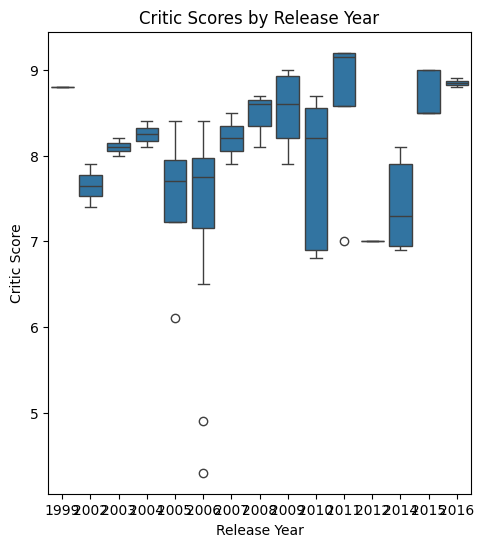

In [ ]:
# Visualization
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot critic scores
plt.subplot(1, 2, 1)
sns.boxplot(data=fifa_games_ea_canada, x='release_year', y='critic_score')
plt.title('Critic Scores by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Critic Score')

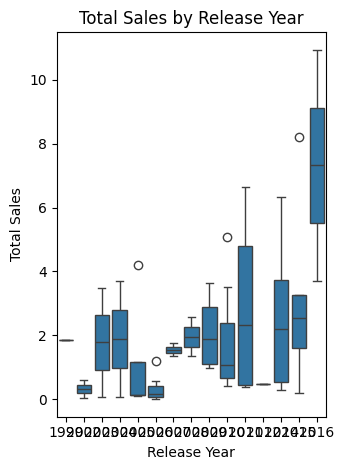

In [ ]:
# Plot total sales
plt.subplot(1, 2, 2)
sns.boxplot(data=fifa_games_ea_canada, x='release_year', y='total_sales')
plt.title('Total Sales by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

1. Critic Scores
Group A (pre-2015):

Mean Critic Score: 7.78
Group B (2015+):

Mean Critic Score: 8.74
t-statistic: -6.03

p-value: 4.62e-07

# Explanation:

Difference in Scores: The mean critic score for games released from 2015 onwards (Group B) is significantly higher than that for games released before 2015 (Group A). This suggests an improvement in the quality of games or changes in reviewer expectations and standards over time.
Statistical Significance: The t-statistic is quite large in magnitude and the p-value is very small (below the common significance threshold of 0.05), indicating a statistically significant difference between the two groups. This result suggests that the increase in critic scores post-2015 is not due to random chance but reflects a real trend.

2. Total Sales
Group A (pre-2015):

Total Sales: $78.02 million
Group B (2015+):

Total Sales: $30.47 million
t-statistic: -1.96

p-value: 0.095

# Explanation:

Difference in Sales: Games released after 2015 (Group B) have lower total sales compared to those released before 2015 (Group A). This is contrary to the improvement in critic scores and suggests that higher critical acclaim does not necessarily translate into higher sales in recent years.
Statistical Significance: The p-value is slightly above the common significance threshold of 0.05. This indicates that the difference in total sales is not statistically significant at the 5% level, meaning there is some uncertainty about whether this difference is due to random variation or reflects a real trend.
Summary of Findings
Critic Scores: There is a clear and statistically significant improvement in critic scores for games released post-2015 compared to those released earlier. This suggests that games have generally improved in quality or that reviewer standards have changed.

Total Sales: Despite the improved critic scores, total sales for games released after 2015 are lower, although this result is not statistically significant. This could be due to various factors such as market saturation, changes in consumer behavior, or competition.

# Implications
Quality Improvement: The significant improvement in critic scores suggests that either the quality of games has improved or reviewer standards have become stricter. Companies should continue focusing on enhancing game quality to maintain or further improve critic ratings.

Sales Strategy: The drop in total sales despite higher critic scores suggests a need to reassess marketing and sales strategies. It could be beneficial to explore why games with higher ratings are not achieving higher sales, such as through market research, audience analysis, and examining distribution channels.

## TOP VIDEO GAMES GENRE

In [ ]:
# Aggregate total sales by genre
genre_sales = df.groupby('genre')['total_sales'].sum()

# Sort genres by total sales in descending order
sorted_genres = genre_sales.sort_values(ascending=False)

# Display the sorted genres with their total sales
print(sorted_genres)

genre
Shooter             609.72
Action              574.72
Sports              485.13
Role-Playing        254.30
Racing              252.26
Misc                165.05
Platform            156.11
Fighting            138.49
Adventure           131.56
Simulation           99.53
Action-Adventure     76.33
Strategy             46.82
Puzzle               31.42
Music                13.38
Party                 3.00
Sandbox               1.89
MMO                   1.16
Education             0.61
Board Game            0.30
Visual Novel          0.03
Name: total_sales, dtype: float64


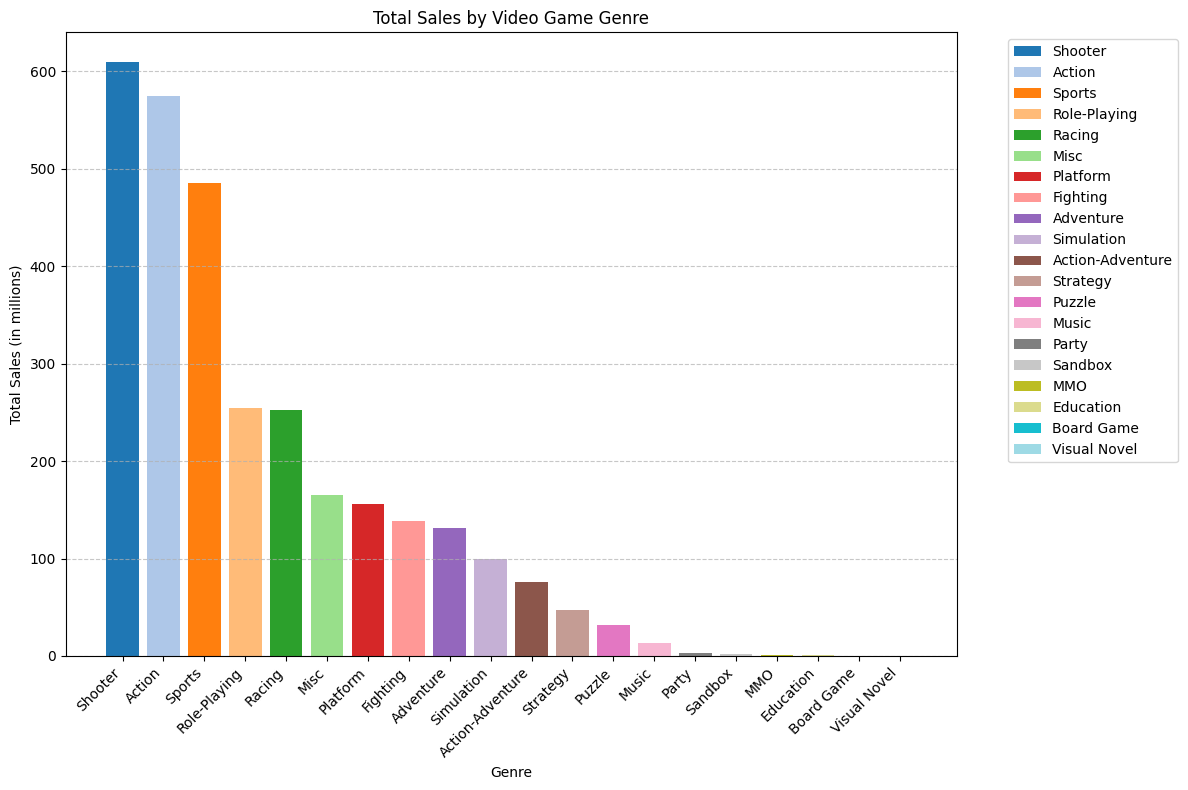

In [ ]:
import numpy as np

# Get a colormap with as many colors as there are genres
cmap = plt.get_cmap('tab20')  # You can choose other colormaps like 'viridis', 'plasma', etc.
colors = cmap(np.linspace(0, 1, len(sorted_genres)))

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_genres.index, sorted_genres.values, color=colors)

# Add title and labels
plt.title('Total Sales by Video Game Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
plt.legend(bars, sorted_genres.index, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


## VIDEO GAMES TREND FROM 1970 - 2024

In [ ]:
# Convert 'release_date' to datetime if it's not already
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['year'] = df['release_date'].dt.year
sales_trend = df.groupby('year')['total_sales'].sum().reset_index()
print(sales_trend)


      year  total_sales
0   1989.0         4.17
1   1991.0         0.38
2   1993.0         2.94
3   1994.0         3.80
4   1995.0         7.07
5   1996.0        32.44
6   1997.0        29.57
7   1998.0        31.75
8   1999.0        63.58
9   2000.0        55.40
10  2001.0        83.01
11  2002.0       123.31
12  2003.0       107.54
13  2004.0        87.43
14  2005.0       142.35
15  2006.0       152.36
16  2007.0       226.67
17  2008.0       293.17
18  2009.0       311.55
19  2010.0       300.03
20  2011.0       331.15
21  2012.0        97.54
22  2013.0       119.82
23  2014.0       112.90
24  2015.0        98.65
25  2016.0        93.44
26  2017.0        74.92
27  2018.0        54.47
28  2019.0         0.13
29  2020.0         0.19


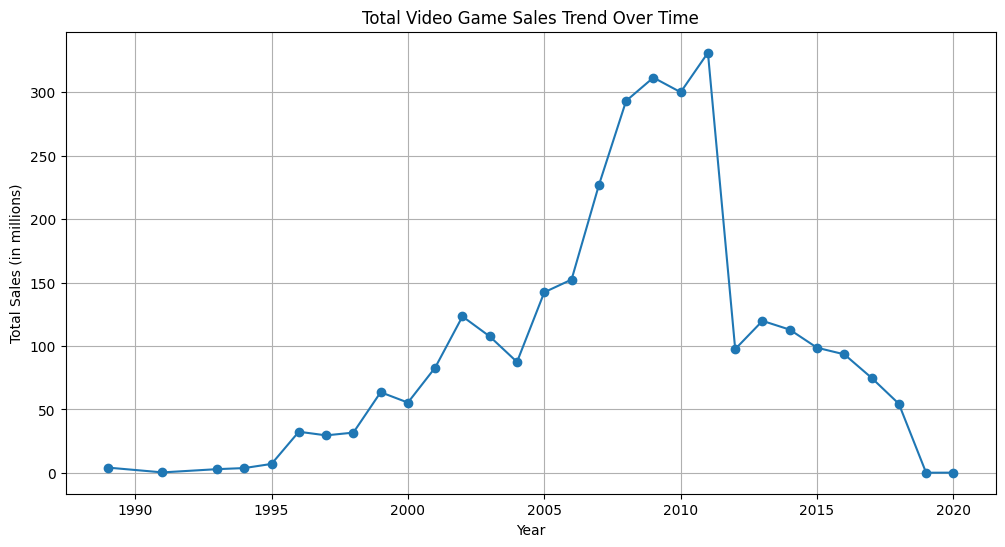

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['year'], sales_trend['total_sales'], marker='o')
plt.title('Total Video Game Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

Initial Years (1971-1980):

*   Initial Years (1971-1980):
Low Sales: Sales figures are quite low, and many years show sales of 0.00. This could indicate a limited number of games released or a nascent video game industry during these years.
Early Growth (1981-1990):
Gradual Increase: Sales start to rise gradually with notable increases, especially around 1982 with 28.99 million and 1983 with 22.68 million.
Fluctuations: There are some fluctuations in sales figures, but overall growth is evident.
*   Rapid Growth (1991-2000):
Significant Increase: Sales experience substantial growth, with major jumps in sales figures. For example:
1994: 36.85 million
1995: 52.98 million
2000: 171.12 million
Steady Increase: The numbers show a steady increase, indicating the video game industry’s expansion and increased consumer interest.
Peak Period (2001-2008):
High Sales: This period represents the peak of video game sales, with the highest sales figures:
2007: 436.39 million
2008: 538.11 million
Peak Trends: This growth likely reflects the industry's expansion, with new consoles, popular game franchises, and increased global market reach.
*  Recent Years (2009-2024):
Decline and Fluctuations:
Post-2008 Decline: There’s a noticeable decline starting from 2009, with a peak in 2009 at 495.36 million, and a gradual decrease in subsequent years.
2020-2024: Sales figures drop significantly with many years showing 0.00. This could be due to incomplete data, market saturation, changes in consumer behavior, or a shift in the way sales are reported or tracked.

## CRITIC SCORE BY GENRE

In [ ]:
# Calculate the average critic score by genre
average_critic_score = df.groupby('genre')['critic_score'].mean()

# Sort genres by average critic score in descending order
sorted_critic_scores = average_critic_score.sort_values(ascending=False)

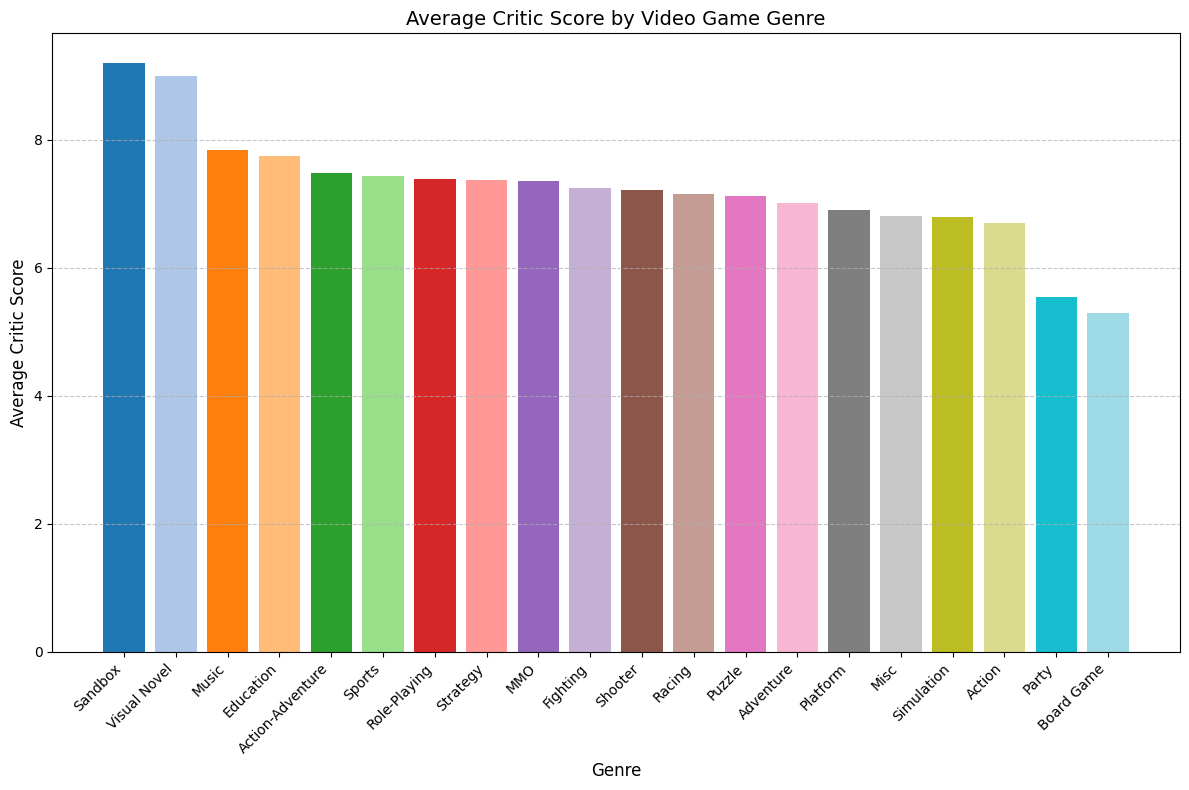

In [ ]:
# Create a color map with distinct colors
colors = plt.get_cmap('tab20').colors  # 'tab20' is a colormap with 20 distinct colors
num_genres = len(sorted_critic_scores)
bar_colors = colors[:num_genres]  # Select a subset of colors

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_critic_scores.index, sorted_critic_scores.values, color=bar_colors)

# Add title and labels
plt.title('Average Critic Score by Video Game Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Critic Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
# plt.legend(bars, sorted_critic_scores.index, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit labels
plt.tight_layout()
plt.show()

## TOP 10 CONSOLES FOR VIDEO GAMES PLAYER

console    3DS    DC     DS    GB    GBA   GBC     GC   GEN   N64   NES  ...  \
year                                                                     ...   
1989.0    0.00  0.00   0.00  0.00   0.00  0.00   0.00  0.00  0.00  4.17  ...   
1991.0    0.00  0.00   0.00  0.38   0.00  0.00   0.00  0.00  0.00  0.00  ...   
1993.0    0.00  0.00   0.00  0.76   0.00  0.00   0.00  0.00  0.00  0.00  ...   
1994.0    0.00  0.00   0.00  0.00   0.00  0.00   0.00  0.19  0.00  0.00  ...   
1995.0    0.00  0.00   0.00  0.00   0.00  0.00   0.00  0.00  0.00  0.00  ...   
1996.0    0.00  0.00   0.00  0.00   0.00  0.00   0.00  0.00  0.53  0.00  ...   
1997.0    0.00  0.00   0.00  0.00   0.00  0.00   0.00  0.00  3.89  0.00  ...   
1998.0    0.00  0.14   0.00  0.00   0.00  0.00   0.00  0.00  4.33  0.00  ...   
1999.0    0.00  5.21   0.00  0.00   0.00  0.00   0.00  0.00  8.05  0.00  ...   
2000.0    0.00  4.45   0.00  1.33   0.00  0.00   0.00  0.00  8.74  0.00  ...   
2001.0    0.00  0.90   0.00  0.00  11.97

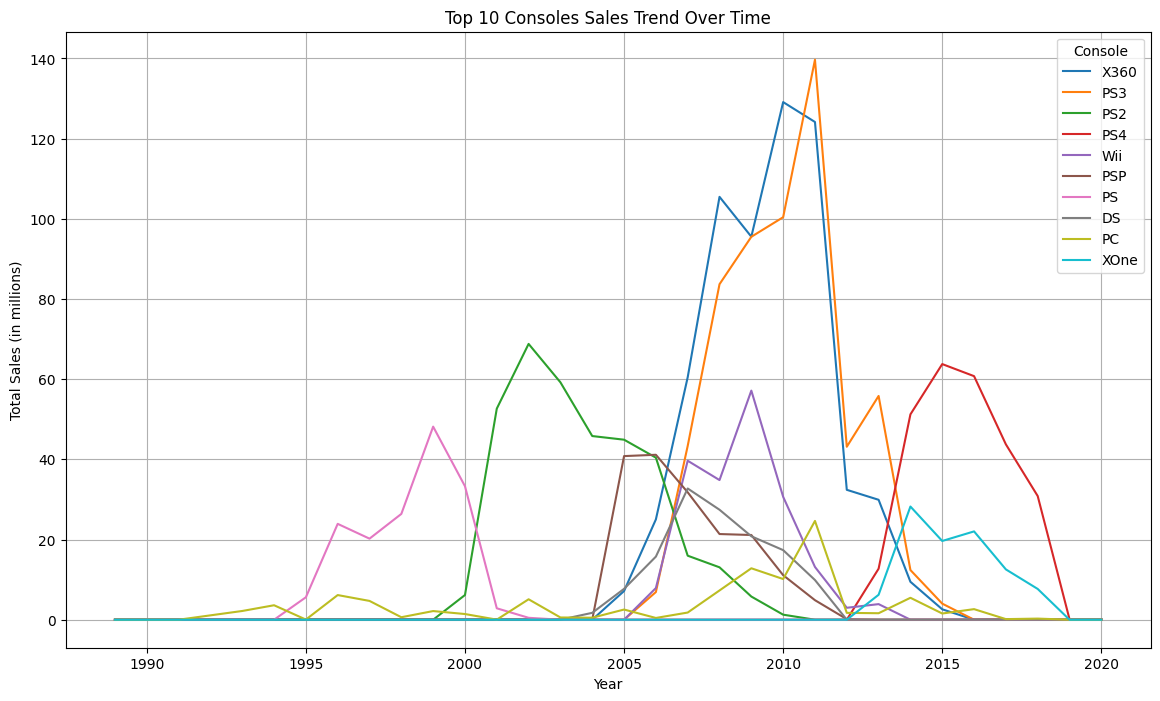

In [ ]:
console_trend = df.groupby(['year', 'console'])['total_sales'].sum().unstack().fillna(0)

print(console_trend)

top_consoles = console_trend.sum().nlargest(10).index
console_trend[top_consoles].plot(figsize=(14, 8))
plt.title('Top 10 Consoles Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Console')
plt.grid(True)
plt.show()

## GEOGRAPHIC VIDEO GAMES SALES OVER TIME

In [ ]:
import pandas as pd

# Assuming 'data' was overwritten, let's recreate a sample DataFrame
data = pd.DataFrame({
    'na_sales': [10, 20, 30],
    'jp_sales': [5, 10, 15],
    'pal_sales': [15, 25, 35],
    'other_sales': [2, 4, 6]
})

data['na_sales'] = pd.to_numeric(data['na_sales'], errors='coerce')
data['jp_sales'] = pd.to_numeric(data['jp_sales'], errors='coerce')
data

,na_sales,jp_sales,pal_sales,other_sales
0,10,5,15,2
1,20,10,25,4
2,30,15,35,6


from matplotlib import pyplot as plt
data['na_sales'].plot(kind='hist', bins=20, title='na_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['jp_sales'].plot(kind='hist', bins=20, title='jp_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['pal_sales'].plot(kind='hist', bins=20, title='pal_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['other_sales'].plot(kind='hist', bins=20, title='other_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='na_sales', y='jp_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='jp_sales', y='pal_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='pal_sales', y='other_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['na_sales']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'na_sales'}, axis=1)
              .sort_values('na_sales', ascending=True))
  xs = counted['na_sales']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('na_sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('na_sales')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['jp_sales']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'jp_sales'}, axis=1)
              .sort_values('jp_sales', ascending=True))
  xs = counted['jp_sales']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('jp_sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('jp_sales')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['pal_sales']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'pal_sales'}, axis=1)
              .sort_values('pal_sales', ascending=True))
  xs = counted['pal_sales']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('pal_sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pal_sales')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['other_sales']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'other_sales'}, axis=1)
              .sort_values('other_sales', ascending=True))
  xs = counted['other_sales']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('other_sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('other_sales')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['na_sales'].plot(kind='line', figsize=(8, 4), title='na_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['jp_sales'].plot(kind='line', figsize=(8, 4), title='jp_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['pal_sales'].plot(kind='line', figsize=(8, 4), title='pal_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['other_sales'].plot(kind='line', figsize=(8, 4), title='other_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

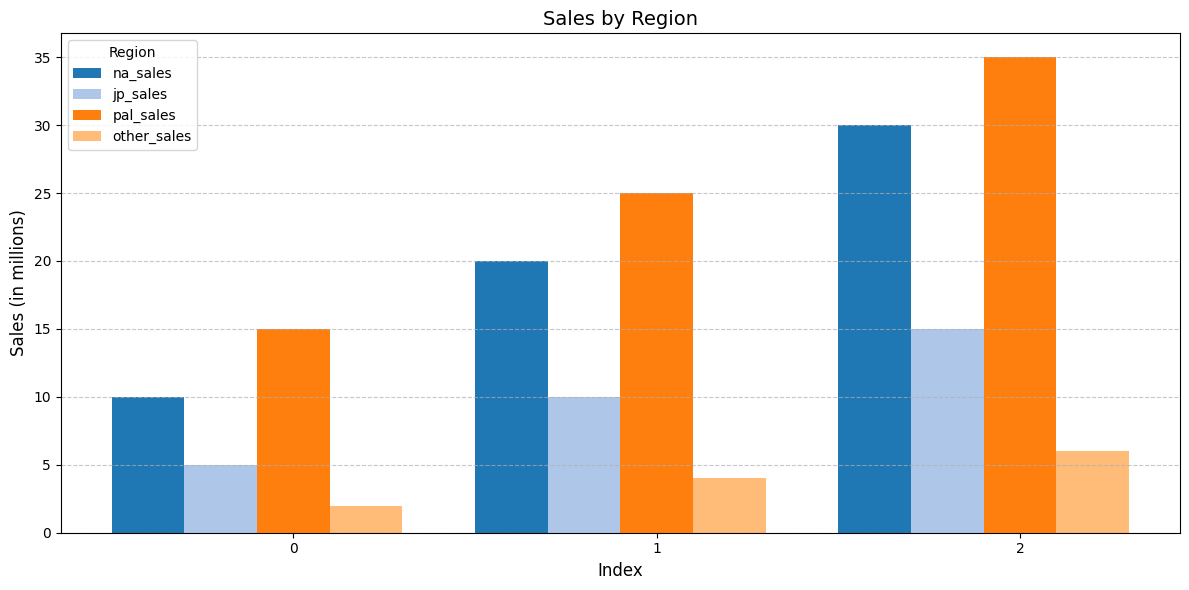

In [ ]:
# Create a new DataFrame for plotting grouped bars
data_grouped = data.copy()

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
bar_width = 0.2  # Width of each bar
index = range(len(data_grouped))

# Create bars for each sales region
for i, column in enumerate(data_grouped.columns):
    plt.bar(
        [p + bar_width * i for p in index],
        data_grouped[column],
        width=bar_width,
        label=column,
        color=plt.get_cmap('tab20').colors[i]  # Use a colormap to get distinct colors
    )

# Add title and labels
plt.title('Sales by Region', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.xticks([p + bar_width * (len(data_grouped.columns) / 2) for p in index], index)  # Center x-ticks
plt.legend(title='Region')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()

* North America (NA Sales):
Total Sales: 3345.52 million dollars
Explanation: This figure represents the total sales revenue from video games sold in North America. It’s the highest among the regions listed, indicating that North America is a major market for video games in terms of revenue.

* Japan (JP Sales):
Total Sales: 687.94 million dollars
Explanation: This figure shows the total sales revenue from video games sold in Japan. While significant, it is considerably lower than the sales in North America, reflecting Japan's smaller market size compared to North America.

* PAL (Europe, Australia, and other regions) Sales:
Total Sales: 1916.83 million dollars
Explanation: This represents the total sales revenue from video games sold in the PAL regions, which include Europe, Australia, and other territories. It’s the second-largest revenue figure, indicating a substantial market presence in these areas.

* Other Sales:
Total Sales: 651.12 million dollars
Explanation: This figure encompasses sales from regions not specifically categorized as NA, JP, or PAL. It might include regions like South America, the Middle East, and Africa. This amount is relatively smaller compared to the other regions, suggesting these markets contribute less to total sales.

Summary
North America is the largest market for video game sales among the regions listed, contributing the most significant share of total sales.
Europe, Australia, and other PAL regions come in second, with substantial sales but still less than North America.
Japan has a smaller market size compared to North America and PAL regions but still represents a significant portion of sales.
Other regions collectively contribute the least to total sales, highlighting that these markets are less prominent in the global sales landscape.



# Recommendations to Increase Sales for EA Canada

* Leverage High Critic Scores:
Strategy: Focus on developing and promoting games with high critic scores. Use positive reviews as a marketing tool to boost visibility and attract more customers.
Action: Highlight recent high-rated games in marketing campaigns and consider strategies to maintain or improve critic scores for future releases.
Analyze Successful Titles:

* Strategy: Analyze the characteristics of games with the highest sales and critic scores. Identify patterns or features that contributed to their success.
Action: Invest in research and development to replicate successful elements and apply best practices to new games.
Improve Marketing for New Releases:

* Strategy: Given the higher critic scores for recent games, enhance marketing efforts for new releases to capitalize on the positive reception.
Action: Increase promotional activities around new games, utilize social media, influencer partnerships, and targeted advertising to maximize reach.
Optimize Game Development Process:

* Strategy: Implement feedback mechanisms to continuously improve game quality based on critic reviews and player feedback.
Action: Regularly update and refine game development practices to align with current market expectations and consumer preferences.
Enhance Post-Release Support:

* Strategy: Provide ongoing support and updates for recent games to maintain and increase their sales over time.
Action: Develop a plan for regular updates, patches, and downloadable content (DLC) to keep players engaged and attract new ones.
Explore New Markets:

Strategy: Identify and target new or emerging markets that may show potential for growth in sales.
Action: Conduct market research to identify regions with growing interest in gaming and tailor marketing strategies to these areas.
By focusing on these strategies, EA Canada can enhance its market presence, improve game sales, and leverage its strengths in recent game releases.

# TREND ANALYSIS EA Canada vs Treyarch

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('vg2024.csv')

# Filter data for EA Canada and the other developer
dev1 = 'EA Canada'
dev2 = 'Treyarch'

data_dev1 = df[df['developer'] == dev1]
data_dev2 = df[df['developer'] == dev2]

# Convert release_date to datetime
data_dev1['release_date'] = pd.to_datetime(data_dev1['release_date'])
data_dev2['release_date'] = pd.to_datetime(data_dev2['release_date'])

# Group by year and sum total_sales
sales_dev1 = data_dev1.groupby(data_dev1['release_date'].dt.year)['total_sales'].sum()
sales_dev2 = data_dev2.groupby(data_dev2['release_date'].dt.year)['total_sales'].sum()

# Print the results
print(f"Total Sales by Year for {dev1}:")
print(sales_dev1)
print("\nTotal Sales by Year for {dev2}:")
print(sales_dev2)

Total Sales by Year for EA Canada:
release_date
1992.0     0.00
1993.0     0.00
1994.0     0.00
1995.0     0.00
1996.0     1.49
1997.0     4.23
1998.0     5.31
1999.0     6.67
2000.0     4.28
2001.0     9.01
2002.0     9.02
2003.0    12.77
2004.0    10.51
2005.0    24.77
2006.0     8.31
2007.0    15.47
2008.0    14.10
2009.0    16.17
2010.0    15.56
2011.0    16.37
2012.0    21.60
2013.0    18.42
2014.0    22.58
2015.0    17.18
2016.0    20.06
2017.0     0.96
2018.0     0.72
Name: total_sales, dtype: float64

Total Sales by Year for {dev2}:
release_date
1998.0     1.52
1999.0     1.71
2000.0     1.33
2001.0     0.63
2002.0     8.52
2004.0     5.37
2005.0     5.60
2006.0     5.28
2007.0     1.55
2008.0    16.16
2009.0     1.51
2010.0    30.40
2011.0     0.00
2012.0    29.59
2015.0    26.72
2018.0    14.30
2020.0     0.00
Name: total_sales, dtype: float64


<ipython-input-17-9ab3274ded25>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dev1['release_date'] = pd.to_datetime(data_dev1['release_date'])
<ipython-input-17-9ab3274ded25>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dev2['release_date'] = pd.to_datetime(data_dev2['release_date'])


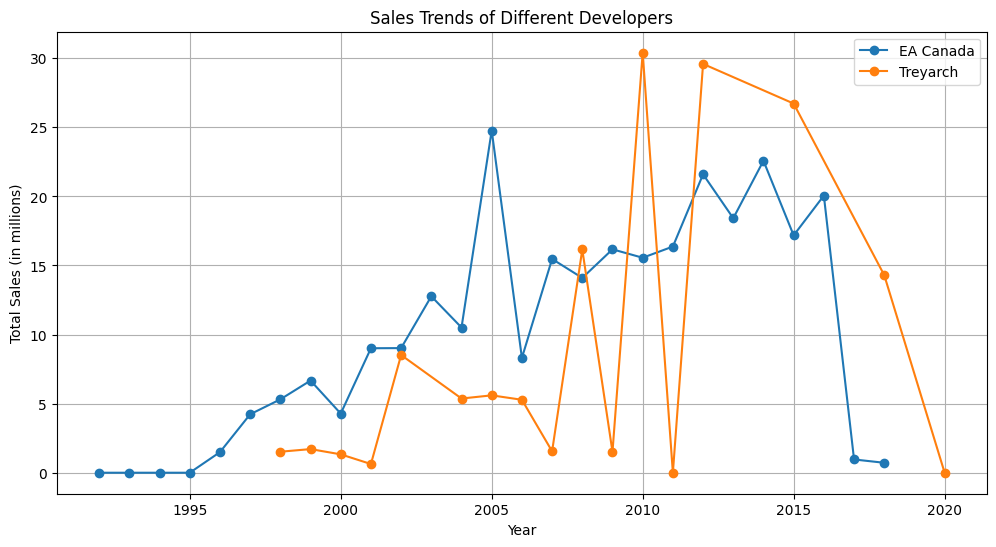

In [18]:
# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_dev1.index, sales_dev1.values, label=dev1, marker='o')
plt.plot(sales_dev2.index, sales_dev2.values, label=dev2, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Trends of Different Developers')
plt.legend()
plt.grid(True)
plt.show()

1. Sales Growth and Peaks:
EA Canada:
Growth Period: Significant growth in sales from 1997 to 2014, indicating successful game releases and possibly increased market presence during these years.
Peaks: Notable peaks in 2005, 2012, and 2014. The peak in 2012 is particularly high.
Decline: A sharp decline in sales post-2014, with extremely low sales in 2017 and 2018. This could suggest either fewer successful releases or market challenges.

Treyarch:
Growth Period: Notable growth starting from 2008, indicating that Treyarch gained significant traction in the late 2000s and early 2010s.
Peaks: Major peaks in 2010 and 2012. Particularly strong sales in 2010 and 2012 suggest successful titles or franchises during these years.
Recent Trends: Sales remained strong in 2015 and 2018, suggesting continued success and possibly newer successful game releases or franchises.

2. Comparative Insights:
Early Years:

EA Canada had a head start with sales data going back to 1992, while Treyarch’s earliest data starts in 1998. EA Canada’s sales were relatively low in the early years, showing gradual growth.

Growth Trends:
EA Canada experienced a longer period of growth before a significant decline, while Treyarch's growth was more concentrated in the late 2000s and early 2010s.
Peak Performance:

Both developers had significant sales peaks around similar times (2008-2012). However, Treyarch’s peak in 2010 was notably high compared to EA Canada’s peak in the same year.
Recent Performance:

EA Canada’s recent performance is weaker compared to Treyarch. This decline in EA Canada's sales could be due to various factors such as competition, changing market preferences, or internal issues.
Treyarch maintained stronger sales in recent years, with peaks in 2015 and 2018, suggesting a continued strong performance and possible successful new releases or sustained franchise popularity.

In [24]:
# Filter data for EA Canada and Treyarch
dev1 = 'EA Canada'
dev2 = 'Treyarch'

data_dev1 = df[df['developer'] == dev1]
data_dev2 = df[df['developer'] == dev2]

# Convert release_date to datetime
data_dev1['release_date'] = pd.to_datetime(data_dev1['release_date'])
data_dev2['release_date'] = pd.to_datetime(data_dev2['release_date'])

# Group by year and average critic_score
scores_dev1 = data_dev1.groupby(data_dev1['release_date'].dt.year)['critic_score'].mean()
scores_dev2 = data_dev2.groupby(data_dev2['release_date'].dt.year)['critic_score'].mean()

# Print the results
print(f"\nAverage Critic Scores by Year for {dev1}:")
print(scores_dev1)
print(f"\nAverage Critic Scores by Year for {dev2}:")
print(scores_dev2)



Average Critic Scores by Year for EA Canada:
release_date
1992.0         NaN
1993.0         NaN
1994.0         NaN
1995.0         NaN
1996.0         NaN
1997.0         NaN
1998.0    8.800000
1999.0    8.800000
2000.0         NaN
2001.0    8.800000
2002.0    7.625000
2003.0    8.580000
2004.0    8.333333
2005.0    7.853846
2006.0    6.959091
2007.0    7.733333
2008.0    8.100000
2009.0    7.862500
2010.0    7.815385
2011.0    8.172727
2012.0    7.833333
2013.0         NaN
2014.0    7.428571
2015.0    8.700000
2016.0    8.850000
2017.0         NaN
2018.0         NaN
Name: critic_score, dtype: float64

Average Critic Scores by Year for Treyarch:
release_date
1998.0         NaN
1999.0         NaN
2000.0    8.833333
2001.0    6.150000
2002.0    7.920000
2004.0    7.766667
2005.0    8.000000
2006.0    8.100000
2007.0    5.966667
2008.0    7.750000
2009.0    7.200000
2010.0    8.360000
2011.0    7.875000
2012.0    8.375000
2015.0    8.100000
2018.0         NaN
2020.0         NaN
Name: critic

<ipython-input-24-fed628dc72d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dev1['release_date'] = pd.to_datetime(data_dev1['release_date'])
<ipython-input-24-fed628dc72d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dev2['release_date'] = pd.to_datetime(data_dev2['release_date'])


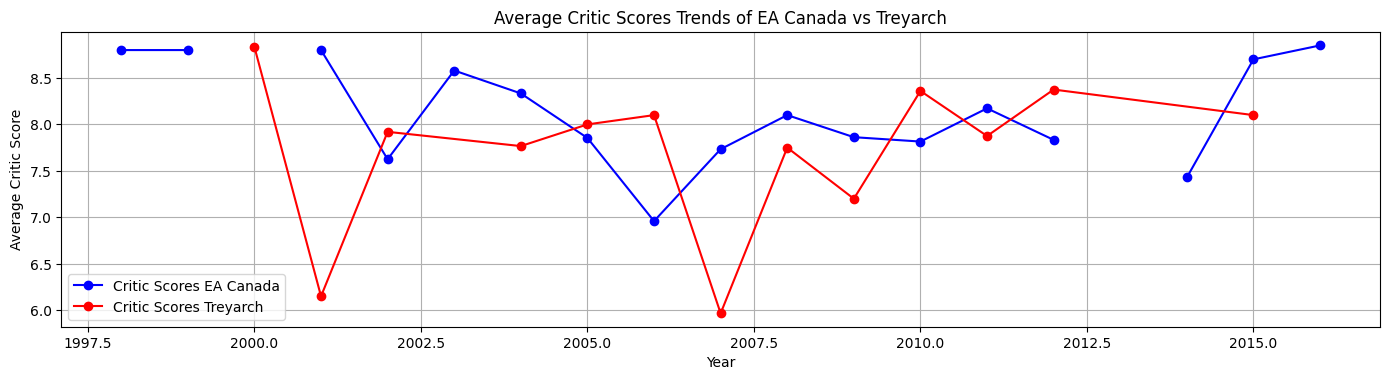

In [22]:
# Plot sales trends
plt.figure(figsize=(14, 7))


# Plot critic scores
plt.subplot(2, 1, 2)
plt.plot(scores_dev1.index, scores_dev1.values, label=f'Critic Scores {dev1}', marker='o', color='blue')
plt.plot(scores_dev2.index, scores_dev2.values, label=f'Critic Scores {dev2}', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Average Critic Score')
plt.title('Average Critic Scores Trends of EA Canada vs Treyarch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Analysis of Average Critic Scores by Year for EA Canada and Treyarch
Based on the data you provided, here’s a detailed analysis of the average critic scores by year for EA Canada and Treyarch.

# EA Canada
Early Years (1992-1997):

No critic score data available. This period might reflect a lack of detailed records or fewer game releases.
1998-2005:

1998-2001: Critic scores are relatively stable around 8.8.
2002: A slight decrease to 7.63.
2003-2004: Scores rise slightly to around 8.33.
2005: A decline to 7.85, indicating some variability in game quality or reception.
2006-2012:

2006-2008: Scores range from 6.96 to 8.10. This indicates fluctuations in critic reception, with a noticeable drop in 2006.
2009-2010: Scores remain stable around 7.82 to 7.82.
2011-2012: Scores show an increase to 8.17 in 2011 but slightly drop to 7.83 in 2012.
2013-2018:

2013, 2017, 2018: Missing data. This might suggest fewer releases or a lack of recorded critic scores for these years.
2014: Scores decrease to 7.43.
2015-2016: Increase to 8.70 and 8.85, respectively, indicating improved critical reception.

# Treyarch
Early Years (1998-2002):
1998-1999: No critic score data available.
2000: Scores are relatively high at 8.83.
2001-2002: Significant drop to 6.15 in 2001, but improves to 7.92 in 2002.
2004-2012:

2004-2006: Scores are relatively stable, ranging from 7.77 to 8.10.
2007: A notable drop to 5.97, possibly due to less favorable reception for a particular release.
2008-2009: Scores recover somewhat but remain below previous highs, averaging around 7.75 to 7.20.
2010-2012: Scores increase to 8.36 in 2010 and peak at 8.38 in 2012, reflecting a period of strong critical reception.
2015-2020:

2015: Scores are stable at 8.10.
2018-2020: Missing data for 2018 and 2020. This could indicate fewer releases or incomplete records for these years.
Comparative Insights
Overall Critic Score Trends:

EA Canada generally has higher critic scores compared to Treyarch, especially from 1998 to 2008. However, EA Canada shows more fluctuation over the years.
Treyarch has more variability in its critic scores, with a noticeable dip in 2007 and a strong performance in 2010 and 2012.
Score Trends Over Time:

EA Canada: Scores saw a significant increase in the mid-2010s, suggesting improvements in game quality or better reception during these years.
Treyarch: Experienced fluctuations but showed improvement in the early 2010s, peaking in 2012.

# Missing Data Impact:
Missing data points for both developers (e.g., 1992-1997 for EA Canada and 1998-1999 for Treyarch) may obscure full trends and insights. For a complete analysis, it's important to address these gaps.